## **Preposessing Dataset Training**

---

Dataset tweet berasal dari penelitian: [Emotion dataset from Indonesian public opinion](https://www.sciencedirect.com/science/article/pii/S2352340922006588?via%3Dihub)

Dataset                              : [link Dataset](https://github.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion)

## Installing Package

In [178]:
! pip install sastrawi

## Import Library

In [179]:
import pandas as pd
import numpy
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from nltk import tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, HTML

# Load Data Train

In [180]:
anger_data = pandas.read_csv("./Dataset/Training/Training_Raw/AngerData.csv", on_bad_lines="skip", delimiter="\t")
anger_data

,Tweet,Label
0,pagi2 udah di buat emosi :),Anger
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertent...",Anger
2,dah lah emosi mulu liat emyu,Anger
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah....",Anger
4,dih lu yg nyebelin bego,Anger
...,...,...
1125,"dan yg emng belom tau banyak lah tentang dunia ini gitu. tapi gw ngerasa sedih dan marah aja, gatau deh rasanya campur aduk. ini aja ngetik sambil...",Anger
1126,"aa kesel bgt anying. dia sudah di bandaraa, gift gue blm siap. ya allah sedih bgt gue uda gbsa nepatin janji buat meet up dari desember trs harini...",Anger
1127,"ini segala keresahan gua udah mau ilang nihh, pokoknya pikiran udah mulai enak deh tapi entah kenapa fyp gua isinya cuplikan film layangan kusut, ...",Anger
1128,"gue pernah datang lebih awal, sebelum waktu nya malah terus malah dibilang kek gini (kurang lebih) saking jombolnya jadi punya banyak waktu luang ...",Anger


In [181]:
fear_data = pandas.read_csv("./Dataset/Training/Training_Raw/FearData.csv", on_bad_lines="skip", delimiter="\t")
fear_data

,Tweet,Label
0,trs barusan dia reach out aku trs minta tolong buat bantu project dia yaallaah aaaa jujur agak takut pressure tp ok gapapa,Fear
1,sumpah ini receh bgt dan not bts related. cm jujur w magang padet bgt dikasih project mayan banyak. trs kemaren ada senior gd presentasi gt dan ke...,Fear
2,ragu utk bisa beli barang tu karn harganya bisa buat cicilan bulanan,Fear
3,bisa gak sih langsung tanggal 11 aja gausah ada tanggal 10 gua takut banget mana 2 hari lagi,Fear
4,iya kaan yg lain suka pada coba pd gpp tp tetep takut wkwk,Fear
...,...,...
906,bgt! sepi dan serem,Fear
907,"sepi aneh kayak ada yg perhatiin tapi gk ada sapa""",Fear
908,joonyoung.. paling merinding sama sedih jadi 1,Fear
909,"mau nonton kukira kau rumah awokaowkwk, tapi takut terlalu sedih jadi kalut",Fear


In [182]:
joy_data = pandas.read_csv("./Dataset/Training/Training_Raw/JoyData.csv", on_bad_lines="skip", delimiter="\t")
joy_data

,Tweet,Label
0,dipeluk enak nih,Joy
1,masih dongg wkkwkwtar klo gk semangat gk bisa bucinin bebep2 aku,Joy
2,semangat dan bertambah kuatlah kalian frp_natsud_ frp_lucyheart frp_wendy ~,Joy
3,jangan lupa sarapann semangat buat hari inii ayang semoga harimu menyenangkan !!,Joy
4,aw ikut seneng semangat ya kuliahnya!,Joy
...,...,...
1270,yaaaa rumah sepi. mari kita party wakwakk,Joy
1271,"seru tau prenjon zer kdng sedih kdng baper, seru kan",Joy
1272,aahh iyaa bgtt hazaa!! kek tbtb bawaannya mellow bgtt yaa semangaatt hazaa!! semoga mellow2 kzl sedih gajelasnya cpt2 ilang ya,Joy
1273,"kadrun kroco sih cuman dapet nasbung jk ada order demo. tp kini lg sepi order jd kelaparan mknya ngaco meracau jadinya, wkwk ngakak",Joy


In [183]:
love_data = pandas.read_csv("./Dataset/Training/Training_Raw/LoveData.csv", on_bad_lines="skip", delimiter="\t")
love_data

,Tweet,Label
0,"suka banget kata2, ""kebenaran hanya menurut selera kalian saja.""",Love
1,"hanse mode anak rumahan gini tuh aku suka banget wkwk pake kaos terus bawahnya celana model apapun itu, misal jeans atau training tuh fav banget s...",Love
2,"ya kali ngejar ngejar cinta, ngejar tahajjud aja kadang suka telat",Love
3,"selamat pagi sender! sana avail nih pas hari valentine, nanti disayang-sayang sama sana, dia orangnya manja dan suka manjain balik terus juga suka...",Love
4,sopaa!! cuz akuu suka banget jurusan tari di sana aku sering ngikutin daily school nya anak sopaa dan itu asik asik bangett mereka juga suka ada e...,Love
...,...,...
755,ngeliat teaser wonpil jadi sedih anjir apaan sih sebel tapi sayang,Love
756,"lae ku sayang jangan sedih ya, bentar lagu kau menyusul junjungan mu yang kau bela mati matian kemarin sayang kamu",Love
757,"lockey tetep harus support secret number juga, dan bia nerima member baru juga. iya kita sedih, tp kepikiran ga si sama eonni"" secret number kita ...",Love
758,"ku tetap membelamu meski kau jahat, karna ku cinta padamu",Love


In [184]:
neutral_data = pandas.read_csv("./Dataset/Training/Training_Raw/NeutralData.csv", on_bad_lines="skip", delimiter="\t")
neutral_data

,Tweet,Label
0,pengabdian yang terpuji meskipun terlihat biasa,Neutral
1,baru saja mengirim foto,Neutral
2,apa kabar dunia twitter ? masihkah selucu dan seabsurd dulu ?,Neutral
3,yah gimana sih yang yaudah susul aku dulu kita sarapan bubur di tempat biasa,Neutral
4,saja ka dorg suro beli medium 2 set,Neutral
...,...,...
1996,"karena tau rasa kesepian, manusia akan menjadi lebih baik. karena tau rasa sedih, manusia akan menjadi kuat. (princess tutu)",Neutral
1997,"yang terbaik adalah percaya dan berlindung hanya pada tuhan, bukan pada manusia. karena akan ada kecewa jika terlalu percaya pada manusia.",Neutral
1998,sahabat adalah mereka yg tahu bahwa ada sedih di matamu ketika seluruh dunia percaya dengan senyum di wajahmu.,Neutral
1999,"terkadang, bukan karena dusta, kamu membenci seseorang, tapi karena sedih menerima kenyataan bahwa dia tak bisa lagi kamu percaya",Neutral


In [185]:
sad_data = pandas.read_csv("./Dataset/Training/Training_Raw/SadData.csv", on_bad_lines="skip", delimiter="\t")
sad_data

,Tweet,Label
0,"akibat dari telat bangun, anak ikut bangun dan dapur dan rumah tidak kepegang sampe jam segini. sedih karena berantakan, tp gppa dehh penting anak...",Sad
1,sepi,Sad
2,sedih dah,Sad
3,"sedih emg kalo ditinggal temen ngebucin, sedih ga ada waktu main sm temen, sedih krna pengen ngebucin jg",Sad
4,sedih bener niih club ya,Sad
...,...,...
998,pagi saat seisi semesta sujud pada zat yg acap lupa kau sebut sebab kesombongan yg membalut pagi ketika angin berbisik lirih saat malaikat rahmat ...,Sad
999,"meski engkau yg pergi, meski engkau yg meninggalkan. meski engkau hilang,, tp engkau ttp bagiku msh ada si sampingku sprt biasanya,, maaf saat ini...",Sad
1000,udah biasa kalah dan tersakiti,Sad
1001,"apakabar ku?. apakah baik-baik saja,, tidak, aku sedang tidak baik fikiranku sedang tak menentu",Sad


Gabungkan semua data menjadi satu dataframe.

In [186]:
train_data = pandas.concat([anger_data,fear_data,joy_data,love_data,neutral_data,sad_data])
train_data.reset_index(inplace=True,drop=True)
train_data

,Tweet,Label
0,pagi2 udah di buat emosi :),Anger
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertent...",Anger
2,dah lah emosi mulu liat emyu,Anger
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah....",Anger
4,dih lu yg nyebelin bego,Anger
...,...,...
7075,pagi saat seisi semesta sujud pada zat yg acap lupa kau sebut sebab kesombongan yg membalut pagi ketika angin berbisik lirih saat malaikat rahmat ...,Sad
7076,"meski engkau yg pergi, meski engkau yg meninggalkan. meski engkau hilang,, tp engkau ttp bagiku msh ada si sampingku sprt biasanya,, maaf saat ini...",Sad
7077,udah biasa kalah dan tersakiti,Sad
7078,"apakabar ku?. apakah baik-baik saja,, tidak, aku sedang tidak baik fikiranku sedang tak menentu",Sad


In [187]:
train_data.to_csv('./Dataset/Training/not_preposessing.csv')

# EDA

Sebelum melakukan preprossing pada data, akan dilakukan eda secara singkat untuk melihat tipe data dan null values pada data.

In [188]:
eda_data = train_data.copy()

## Null Values

In [189]:
print("Null Values:")
eda_data.isna().sum()

Null Values:


Tweet    0
Label    0
dtype: int64

## Data Types

In [190]:
print("Data Types:")
eda_data.info()

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7080 entries, 0 to 7079
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   7080 non-null   object
 1   Label   7080 non-null   object
dtypes: object(2)
memory usage: 110.8+ KB


## Label Proportion

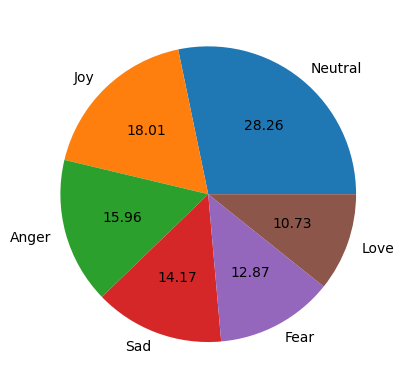

In [191]:
fig = plt.Figure(figsize=(25,25))
plt.pie(eda_data["Label"].value_counts().values,
        labels=eda_data["Label"].value_counts().index,
        autopct='%.2f')
plt.show()

Netral memiliki lebih banyak data dibandingkan label yang lain. 

## Data Distribution

In [192]:
eda_data['Length'] = eda_data['Tweet'].str.len()
eda_data.head(10)

,Tweet,Label,Length
0,pagi2 udah di buat emosi :),Anger,27
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertent...",Anger,184
2,dah lah emosi mulu liat emyu,Anger,28
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah....",Anger,277
4,dih lu yg nyebelin bego,Anger,23
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp ...",Anger,211
6,drama abg tolol,Anger,15
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,Anger,87
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya",Anger,58
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,Anger,136


In [193]:
print(f"Rata-rata panjang karakter tweet : {eda_data['Length'].mean():.2f}")

Rata-rata panjang karakter tweet : 99.51


In [194]:
print(f"Jumlah panjang karakter tweet  : {eda_data['Length'].sum():.2f}")

Jumlah panjang karakter tweet  : 704496.00


In [195]:
def word_count(tweet):
    tweet_list = tweet.split()
    return len(tweet_list)

In [196]:
eda_data['Word_count'] = eda_data['Tweet'].apply(word_count)
eda_data.head(10)

,Tweet,Label,Length,Word_count
0,pagi2 udah di buat emosi :),Anger,27,6
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertent...",Anger,184,25
2,dah lah emosi mulu liat emyu,Anger,28,6
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah....",Anger,277,40
4,dih lu yg nyebelin bego,Anger,23,5
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp ...",Anger,211,37
6,drama abg tolol,Anger,15,3
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,Anger,87,13
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya",Anger,58,9
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,Anger,136,21


In [197]:
print(f"Jumlah kata : {eda_data['Word_count'].sum():.2f}")

Jumlah kata : 118666.00


In [198]:
print(f"Rata-rata jumlah kata : {eda_data['Word_count'].mean():.2f}")

Rata-rata jumlah kata : 16.76


In [199]:
eda_data['mean_word_length'] = eda_data['Tweet'].map(lambda rev: numpy.mean([len(word) for word in rev.split()]))
eda_data.head(10)

,Tweet,Label,Length,Word_count,mean_word_length
0,pagi2 udah di buat emosi :),Anger,27,6,3.666667
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertent...",Anger,184,25,6.400000
2,dah lah emosi mulu liat emyu,Anger,28,6,3.833333
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah....",Anger,277,40,5.950000
4,dih lu yg nyebelin bego,Anger,23,5,3.800000
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp ...",Anger,211,37,4.729730
6,drama abg tolol,Anger,15,3,4.333333
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,Anger,87,13,5.769231
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya",Anger,58,9,5.555556
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,Anger,136,21,5.523810


In [200]:
eda_data['mean_sent_length'] = eda_data['Tweet'].map(lambda rev: numpy.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
eda_data.head(10)

,Tweet,Label,Length,Word_count,mean_word_length,mean_sent_length
0,pagi2 udah di buat emosi :),Anger,27,6,3.666667,27.000000
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertent...",Anger,184,25,6.400000,184.000000
2,dah lah emosi mulu liat emyu,Anger,28,6,3.833333,28.000000
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah....",Anger,277,40,5.950000,29.888889
4,dih lu yg nyebelin bego,Anger,23,5,3.800000,23.000000
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp ...",Anger,211,37,4.729730,211.000000
6,drama abg tolol,Anger,15,3,4.333333,15.000000
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,Anger,87,13,5.769231,28.333333
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya",Anger,58,9,5.555556,58.000000
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,Anger,136,21,5.523810,136.000000


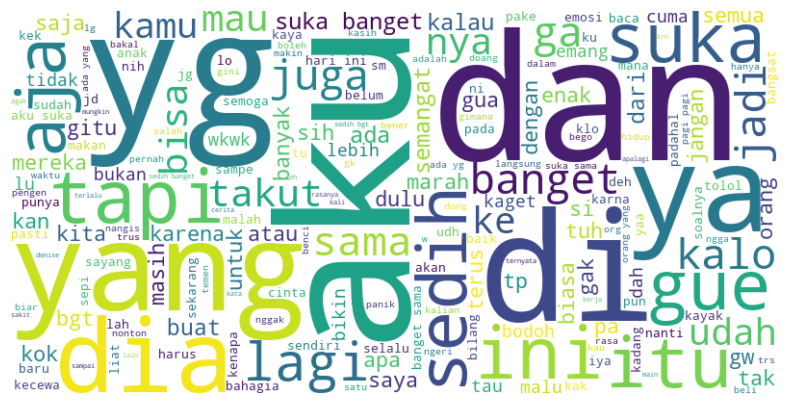

In [201]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam satu string
all_tweets = ' '.join(eda_data['Tweet'])

# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Preprocessing

In [202]:
import copy

train_data_copy = copy.deepcopy(train_data)


## Case Folding

### Lowercase

In [203]:
def tweet_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [204]:
%%time
train_data["Tweet"] = train_data["Tweet"].apply(tweet_lowercase)

CPU times: total: 31.2 ms
Wall time: 19.6 ms


In [205]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['Tweet'],
    'After ': train_data['Tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah di buat emosi :),pagi2 udah di buat emosi :)
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh..","kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh.."
2,dah lah emosi mulu liat emyu,dah lah emosi mulu liat emyu
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya"
4,dih lu yg nyebelin bego,dih lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol"
6,drama abg tolol,drama abg tolol
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [206]:
%%time
train_data_copy["Tweet"] = train_data_copy["Tweet"].apply(tweet_lowercase)

CPU times: total: 0 ns
Wall time: 9.34 ms


## Cleansing

### Menghapus username

In [207]:
def tweet_delete_username(tweet):
    userPattern       = '@[^\s]+'
    # Ngehapus kata "username" 
    tweet = re.sub(userPattern, '[USERNAME]', tweet)
    
    return tweet

In [208]:
%%time
train_data["Tweet"] = train_data["Tweet"].apply(tweet_delete_username)

CPU times: total: 0 ns
Wall time: 19.2 ms


In [209]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['Tweet'],
    'After ': train_data['Tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah di buat emosi :),pagi2 udah di buat emosi :)
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh..","kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh.."
2,dah lah emosi mulu liat emyu,dah lah emosi mulu liat emyu
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya"
4,dih lu yg nyebelin bego,dih lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol"
6,drama abg tolol,drama abg tolol
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [210]:
%%time
train_data_copy["Tweet"] = train_data_copy["Tweet"].apply(tweet_delete_username)

CPU times: total: 0 ns
Wall time: 13.1 ms


### Menghapus url

In [211]:
def tweet_delete_url(tweet):
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)" #Pola ngehapus url
    tweet = re.sub(urlPattern, '[URL]', tweet)
    return tweet

In [212]:
%%time
train_data["Tweet"] = train_data["Tweet"].apply(tweet_delete_url)

CPU times: total: 93.8 ms
Wall time: 146 ms


In [213]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['Tweet'],
    'After ': train_data['Tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah di buat emosi :),pagi2 udah di buat emosi :)
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh..","kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh.."
2,dah lah emosi mulu liat emyu,dah lah emosi mulu liat emyu
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya"
4,dih lu yg nyebelin bego,dih lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol"
6,drama abg tolol,drama abg tolol
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [214]:
%%time
train_data_copy["Tweet"] = train_data_copy["Tweet"].apply(tweet_delete_url)

CPU times: total: 15.6 ms
Wall time: 71 ms


### Menghapus kelebihan huruf

In [215]:
def tweet_delete_extra_letters(tweet):
    sequencePattern   = r'([A-Za-z])\1{2,}' #Pola ngehapus karakter yang punya kelebihan huruf
    seqReplacePattern = r'\1' #Pola ngereplace yang kelebihan huruf tiga kali
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
    
    return tweet

In [216]:
%%time
train_data["Tweet"] = train_data["Tweet"].apply(tweet_delete_extra_letters)

CPU times: total: 31.2 ms
Wall time: 110 ms


In [217]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['Tweet'],
    'After ': train_data['Tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah di buat emosi :),pagi2 udah di buat emosi :)
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh..","kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh.."
2,dah lah emosi mulu liat emyu,dah lah emosi mulu liat emyu
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya"
4,dih lu yg nyebelin bego,dih lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol"
6,drama abg tolol,drama abg tolol
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [218]:
%%time
train_data_copy["Tweet"] = train_data_copy["Tweet"].apply(tweet_delete_extra_letters)

CPU times: total: 15.6 ms
Wall time: 135 ms


### Menghapus Noise

In [219]:
def tweet_delete_noise(tweet):
        tweet = re.sub(r'(asslamu alaikum|assalamualaikum|asalamualaikum|assalamu\'alaikum|Assalamu alaikum|Assalamualaikum warahmatullahi wabarakatuh|ass wr\. wb\.|ass)', '', tweet)
        tweet = re.sub(r'\b(dah|doi|dih|kok|pol|brow|emyu|skin|anjir|anjay|njir|bjir|jir|njay|anjoy|ajg|min|admin|gan|sis|sih|ke|di|dari|lah|kudu|oalah|lha|yah|yha|amp|n|nih|loo|hadeuh|waduh|sok|na|cing|hadeuh|loh|lho|bro|cui|cuy|yuk|yok|kuy|kan)\b', '', tweet)
        return tweet

In [220]:
%%time
train_data["Tweet"] = train_data["Tweet"].apply(tweet_delete_noise)

CPU times: total: 78.1 ms
Wall time: 245 ms


In [221]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['Tweet'],
    'After ': train_data['Tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah di buat emosi :),pagi2 udah buat emosi :)
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh..","stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi partai tertentu..narasi klhtn intelektual tp bodoh.."
2,dah lah emosi mulu liat emyu,emosi mulu liat
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya"
4,dih lu yg nyebelin bego,lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol"
6,drama abg tolol,drama abg tolol
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [222]:
%%time
train_data_copy["Tweet"] = train_data_copy["Tweet"].apply(tweet_delete_noise)

CPU times: total: 62.5 ms
Wall time: 193 ms


### Menghapus new line dan new text

In [223]:
def tweet_delete_new_line_new_text(tweet):
    tweet = re.sub(r'\\[nt]', ' ', tweet)
    return tweet

In [224]:
%%time
train_data["Tweet"] = train_data["Tweet"].apply(tweet_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 19.3 ms


In [225]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['Tweet'],
    'After ': train_data['Tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah buat emosi :),pagi2 udah buat emosi :)
1,"stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi partai tertentu..narasi klhtn intelektual tp bodoh..","stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi partai tertentu..narasi klhtn intelektual tp bodoh.."
2,emosi mulu liat,emosi mulu liat
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya"
4,lu yg nyebelin bego,lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol"
6,drama abg tolol,drama abg tolol
7,masih emosi sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [226]:
%%time
train_data_copy["Tweet"] = train_data_copy["Tweet"].apply(tweet_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 42.2 ms


### Menghapus angka

In [227]:
def tweet_delete_number(tweet):
    number = r'\d+' #Pola ngehapus angka
    tweet = re.sub(number, '', tweet)
    return tweet

In [228]:
%%time
train_data["Tweet"] = train_data["Tweet"].apply(tweet_delete_number)

CPU times: total: 46.9 ms
Wall time: 87.1 ms


In [229]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['Tweet'],
    'After ': train_data['Tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah buat emosi :),pagi udah buat emosi :)
1,"stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi partai tertentu..narasi klhtn intelektual tp bodoh..","stabilitas negara, memange thn negara tdk aman, bahkan sby menyuburkan ormas radikal, intoleran, teroris, yg berafiliasi partai tertentu..narasi klhtn intelektual tp bodoh.."
2,emosi mulu liat,emosi mulu liat
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya"
4,lu yg nyebelin bego,lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol"
6,drama abg tolol,drama abg tolol
7,masih emosi sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","bangsat tribute no., bencana no. mau ngalahin ini keknya"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [230]:
%%time
train_data_copy["Tweet"] = train_data_copy["Tweet"].apply(tweet_delete_number)

CPU times: total: 15.6 ms
Wall time: 50.1 ms


### Menghapus tanda baca

In [231]:
def tweet_delete_punctuation(tweet):
    punctuationPattern = r'[^\w\s]' 
    tweet = re.sub(punctuationPattern, ' ', tweet)
    
    return tweet

In [232]:
%%time
train_data["Tweet"] = train_data["Tweet"].apply(tweet_delete_punctuation)

CPU times: total: 0 ns
Wall time: 58.9 ms


In [233]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['Tweet'],
    'After ': train_data['Tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi udah buat emosi :),pagi udah buat emosi
1,"stabilitas negara, memange thn negara tdk aman, bahkan sby menyuburkan ormas radikal, intoleran, teroris, yg berafiliasi partai tertentu..narasi klhtn intelektual tp bodoh..",stabilitas negara memange thn negara tdk aman bahkan sby menyuburkan ormas radikal intoleran teroris yg berafiliasi partai tertentu narasi klhtn intelektual tp bodoh
2,emosi mulu liat,emosi mulu liat
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya",aib bodoh benar sebelum kata aib itu muncul terlebih dahulu sudah ada tindakan yakni kekejian jangan kau sembunyikan caramu menelaah masalah semisal anak perempuanmu ditempeleng apa kau juga setuju untuk dia bersikap bungkam melapor polisi adl benar lantas apa bedanya
4,lu yg nyebelin bego,lu yg nyebelin bego
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol",asli malu maluin org indo tolol yg rep latah cilukba pake huruf hijaiyah sm ngntd sama ganti huruf t pake salib ada tiktok filipin lewat fyp aku dan repnya ngtd semua dasar goblogg trend tiktok ter tolol
6,drama abg tolol,drama abg tolol
7,masih emosi sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,masih emosi sama katla kemarin mana keterangannya gini aja hasil mengaci kzl
8,"bangsat tribute no., bencana no. mau ngalahin ini keknya",bangsat tribute no bencana no mau ngalahin ini keknya
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [234]:
%%time
train_data_copy["Tweet"] = train_data_copy["Tweet"].apply(tweet_delete_punctuation)

CPU times: total: 15.6 ms
Wall time: 46.1 ms


### Menghapus Extra Spasi

In [235]:
def tweet_delete_extra_space(tweet):
    tweet = re.sub(r"\s+", " ", tweet)
    tweet = re.sub(r"^\s+|\s+$", "", tweet)
    
    return tweet

In [236]:
%%time
train_data["Tweet"] = train_data["Tweet"].apply(tweet_delete_extra_space)

CPU times: total: 31.2 ms
Wall time: 177 ms


In [237]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['Tweet'],
    'After ': train_data['Tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi udah buat emosi,pagi udah buat emosi
1,stabilitas negara memange thn negara tdk aman bahkan sby menyuburkan ormas radikal intoleran teroris yg berafiliasi partai tertentu narasi klhtn intelektual tp bodoh,stabilitas negara memange thn negara tdk aman bahkan sby menyuburkan ormas radikal intoleran teroris yg berafiliasi partai tertentu narasi klhtn intelektual tp bodoh
2,emosi mulu liat,emosi mulu liat
3,aib bodoh benar sebelum kata aib itu muncul terlebih dahulu sudah ada tindakan yakni kekejian jangan kau sembunyikan caramu menelaah masalah semisal anak perempuanmu ditempeleng apa kau juga setuju untuk dia bersikap bungkam melapor polisi adl benar lantas apa bedanya,aib bodoh benar sebelum kata aib itu muncul terlebih dahulu sudah ada tindakan yakni kekejian jangan kau sembunyikan caramu menelaah masalah semisal anak perempuanmu ditempeleng apa kau juga setuju untuk dia bersikap bungkam melapor polisi adl benar lantas apa bedanya
4,lu yg nyebelin bego,lu yg nyebelin bego
5,asli malu maluin org indo tolol yg rep latah cilukba pake huruf hijaiyah sm ngntd sama ganti huruf t pake salib ada tiktok filipin lewat fyp aku dan repnya ngtd semua dasar goblogg trend tiktok ter tolol,asli malu maluin org indo tolol yg rep latah cilukba pake huruf hijaiyah sm ngntd sama ganti huruf t pake salib ada tiktok filipin lewat fyp aku dan repnya ngtd semua dasar goblogg trend tiktok ter tolol
6,drama abg tolol,drama abg tolol
7,masih emosi sama katla kemarin mana keterangannya gini aja hasil mengaci kzl,masih emosi sama katla kemarin mana keterangannya gini aja hasil mengaci kzl
8,bangsat tribute no bencana no mau ngalahin ini keknya,bangsat tribute no bencana no mau ngalahin ini keknya
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget


In [238]:
%%time
train_data_copy["Tweet"] = train_data_copy["Tweet"].apply(tweet_delete_extra_space)

CPU times: total: 31.2 ms
Wall time: 168 ms


## Tokenization

In [239]:
from nltk.tokenize import word_tokenize 

In [240]:
def tweet_tokenize(tweet):
    return word_tokenize(tweet)

In [241]:
%%time
train_data["Tweet"] = train_data["Tweet"].apply(tweet_tokenize)

CPU times: total: 641 ms
Wall time: 1.88 s


In [242]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['Tweet'],
    'After ': train_data['Tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi udah buat emosi,"[pagi, udah, buat, emosi]"
1,stabilitas negara memange thn negara tdk aman bahkan sby menyuburkan ormas radikal intoleran teroris yg berafiliasi partai tertentu narasi klhtn intelektual tp bodoh,"[stabilitas, negara, memange, thn, negara, tdk, aman, bahkan, sby, menyuburkan, ormas, radikal, intoleran, teroris, yg, berafiliasi, partai, tertentu, narasi, klhtn, intelektual, tp, bodoh]"
2,emosi mulu liat,"[emosi, mulu, liat]"
3,aib bodoh benar sebelum kata aib itu muncul terlebih dahulu sudah ada tindakan yakni kekejian jangan kau sembunyikan caramu menelaah masalah semisal anak perempuanmu ditempeleng apa kau juga setuju untuk dia bersikap bungkam melapor polisi adl benar lantas apa bedanya,"[aib, bodoh, benar, sebelum, kata, aib, itu, muncul, terlebih, dahulu, sudah, ada, tindakan, yakni, kekejian, jangan, kau, sembunyikan, caramu, menelaah, masalah, semisal, anak, perempuanmu, ditempeleng, apa, kau, juga, setuju, untuk, dia, bersikap, bungkam, melapor, polisi, adl, benar, lantas, apa, bedanya]"
4,lu yg nyebelin bego,"[lu, yg, nyebelin, bego]"
5,asli malu maluin org indo tolol yg rep latah cilukba pake huruf hijaiyah sm ngntd sama ganti huruf t pake salib ada tiktok filipin lewat fyp aku dan repnya ngtd semua dasar goblogg trend tiktok ter tolol,"[asli, malu, maluin, org, indo, tolol, yg, rep, latah, cilukba, pake, huruf, hijaiyah, sm, ngntd, sama, ganti, huruf, t, pake, salib, ada, tiktok, filipin, lewat, fyp, aku, dan, repnya, ngtd, semua, dasar, goblogg, trend, tiktok, ter, tolol]"
6,drama abg tolol,"[drama, abg, tolol]"
7,masih emosi sama katla kemarin mana keterangannya gini aja hasil mengaci kzl,"[masih, emosi, sama, katla, kemarin, mana, keterangannya, gini, aja, hasil, mengaci, kzl]"
8,bangsat tribute no bencana no mau ngalahin ini keknya,"[bangsat, tribute, no, bencana, no, mau, ngalahin, ini, keknya]"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,"[pengen, pergi, jauh, terus, teriak, sambil, nangis, sekencang, kencangnya, nanti, balik, kalo, gue, udah, lupa, segalanya, wkwj, kn, tolol, mustahil, banget]"


In [243]:
%%time
train_data_copy["Tweet"] = train_data_copy["Tweet"].apply(tweet_tokenize)

CPU times: total: 922 ms
Wall time: 2.3 s


## Normalization

### Import Kamus

In [244]:
kamus_singkatan = pandas.read_csv("./Dataset/kamus_singkatan.csv",names=["kata_gaul","kata_asal"],delimiter=";")
kamus_singkatan

,kata_gaul,kata_asal
0,aamiin,amin
1,adek,adik
2,adlh,adalah
3,aer,air
4,aiskrim,es krim
...,...,...
1304,yoi,iya
1305,yup,ya
1306,yups,ya
1307,yupz,ya


In [245]:
def create_kamus():
      kamus = {}
      for i in range(len(kamus_singkatan)):
          kamus[kamus_singkatan["kata_gaul"][i]]=kamus_singkatan["kata_asal"][i].lower().strip()
      return kamus

In [246]:
kamus = create_kamus()
kamus

{'aamiin': 'amin',
 'adek': 'adik',
 'adlh': 'adalah',
 'aer': 'air',
 'aiskrim': 'es krim',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'ajalah': 'saja',
 'aje': 'saja',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan',
 'ama': 'sama',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur',
 'ane': 'saya',
 'anget': 'hangat',
 'anjeng': 'anjing',
 'ank': 'anak',
 'apah': 'apa',
 'aph': 'apa',
 'apo': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya',
 'asek': 'asik',
 'ati2': 'hati-hati',
 'atit': 'sakit',
 'atu': 'satu',
 'atw': 'atau',
 'ayang': 'sayang',
 'ayuk': 'ayo',
 'babang': 'abang',
 'bae': 'baik',
 'bais': 'habis',
 'bakalan': 'akan',
 'bales': 'balas',
 'bandingin': 'bandingkan',
 'banget': 'sekali',
 'bangett': 'sangat',
 'banyakin': 'perbanyak',
 'barengan': 'bersamaan',
 'baryaw': 'sabar ya',
 'baso': 'bakso',
 'bay': 'selamat tinggal',
 'bbrp': 'beberapa',
 'bc': 'baca'

In [247]:
def tweet_replace_contractions(tweet):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(contraction) for contraction in kamus.keys()) + r')\b')
    tweet = pattern.sub(lambda x: kamus[x.group()], tweet)
    return tweet

In [248]:
%%time
for i in range(0,len(train_data)):
    himpunan_kata=[]
    for tokenize_tweet in train_data["Tweet"][i]:
        tokenize_tweet = tweet_replace_contractions(tokenize_tweet)
        himpunan_kata.append(tokenize_tweet)
    train_data["Tweet"][i]=himpunan_kata
    i+1

CPU times: total: 1min 39s
Wall time: 3min 46s


In [249]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['Tweet'],
    'After ': train_data['Tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[pagi, udah, buat, emosi]","[pagi, sudah, buat, emosi]"
1,"[stabilitas, negara, memange, thn, negara, tdk, aman, bahkan, sby, menyuburkan, ormas, radikal, intoleran, teroris, yg, berafiliasi, partai, tertentu, narasi, klhtn, intelektual, tp, bodoh]","[stabilitas, negara, memange, tahun, negara, tidak, aman, bahkan, sby, menyuburkan, ormas, radikal, intoleran, teroris, yang, berafiliasi, partai, tertentu, narasi, klhtn, intelektual, tapi, bodoh]"
2,"[emosi, mulu, liat]","[emosi, terus, liat]"
3,"[aib, bodoh, benar, sebelum, kata, aib, itu, muncul, terlebih, dahulu, sudah, ada, tindakan, yakni, kekejian, jangan, kau, sembunyikan, caramu, menelaah, masalah, semisal, anak, perempuanmu, ditempeleng, apa, kau, juga, setuju, untuk, dia, bersikap, bungkam, melapor, polisi, adl, benar, lantas, apa, bedanya]","[aib, bodoh, benar, sebelum, kata, aib, itu, muncul, terlebih, dahulu, sudah, ada, tindakan, yakni, kekejian, jangan, kamu, sembunyikan, caramu, menelaah, masalah, semisal, anak, perempuanmu, ditempeleng, apa, kamu, juga, setuju, untuk, dia, bersikap, bungkam, melapor, polisi, adl, benar, lantas, apa, bedanya]"
4,"[lu, yg, nyebelin, bego]","[kamu, yang, menyebalkan, bodoh]"
5,"[asli, malu, maluin, org, indo, tolol, yg, rep, latah, cilukba, pake, huruf, hijaiyah, sm, ngntd, sama, ganti, huruf, t, pake, salib, ada, tiktok, filipin, lewat, fyp, aku, dan, repnya, ngtd, semua, dasar, goblogg, trend, tiktok, ter, tolol]","[asli, malu, maluin, orang, indo, tolol, yang, rep, latah, cilukba, pakai, huruf, hijaiyah, sama, ngntd, sama, ganti, huruf, t, pakai, salib, ada, tiktok, filipin, lewat, fyp, saya, dan, repnya, ngtd, semua, dasar, goblogg, trend, tiktok, ter, tolol]"
6,"[drama, abg, tolol]","[drama, abg, tolol]"
7,"[masih, emosi, sama, katla, kemarin, mana, keterangannya, gini, aja, hasil, mengaci, kzl]","[masih, emosi, sama, katla, kemarin, mana, keterangannya, gini, saja, hasil, mengaci, kesal]"
8,"[bangsat, tribute, no, bencana, no, mau, ngalahin, ini, keknya]","[bangsat, tribute, no, bencana, no, mau, ngalahin, ini, sepertinya]"
9,"[pengen, pergi, jauh, terus, teriak, sambil, nangis, sekencang, kencangnya, nanti, balik, kalo, gue, udah, lupa, segalanya, wkwj, kn, tolol, mustahil, banget]","[ingin, pergi, jauh, terus, teriak, sambil, nangis, sekencang, kencangnya, nanti, balik, kalau, saya, sudah, lupa, segalanya, wkwj, kan, tolol, mustahil, sekali]"


In [250]:
%%time
for i in range(0,len(train_data_copy)):
    himpunan_kata=[]
    for tokenize_tweet in train_data_copy["Tweet"][i]:
        tokenize_tweet = tweet_replace_contractions(tokenize_tweet)
        himpunan_kata.append(tokenize_tweet)
    train_data_copy["Tweet"][i]=himpunan_kata
    i+1

CPU times: total: 1min 32s
Wall time: 3min 56s


### Stemming

In [251]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()

In [252]:
def tweet_stemming(tweet):
    # Check if the input is a list
    if isinstance(tweet, list):
        stemmed_tweets = []
        # Iterate through each tweet in the list
        for t in tweet:
            # Create a stemmer object
            stemmer = factory.create_stemmer()
            # Stem the tweet and append to the list of stemmed tweets
            stemmed_tweets.append(stemmer.stem(t))
        # Return the list of stemmed tweets
        return stemmed_tweets
    else:
        # If the input is not a list, create a stemmer object
        stemmer = factory.create_stemmer()
        # Stem the single tweet and return
        return stemmer.stem(tweet)

In [253]:
train_data["Tweet"] = train_data["Tweet"].apply(tweet_stemming)

In [254]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['Tweet'],
    'After ': train_data['Tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[pagi, sudah, buat, emosi]","[pagi, sudah, buat, emosi]"
1,"[stabilitas, negara, memange, tahun, negara, tidak, aman, bahkan, sby, menyuburkan, ormas, radikal, intoleran, teroris, yang, berafiliasi, partai, tertentu, narasi, klhtn, intelektual, tapi, bodoh]","[stabilitas, negara, memange, tahun, negara, tidak, aman, bahkan, sby, subur, ormas, radikal, intoleran, teroris, yang, afiliasi, partai, tentu, narasi, klhtn, intelektual, tapi, bodoh]"
2,"[emosi, terus, liat]","[emosi, terus, liat]"
3,"[aib, bodoh, benar, sebelum, kata, aib, itu, muncul, terlebih, dahulu, sudah, ada, tindakan, yakni, kekejian, jangan, kamu, sembunyikan, caramu, menelaah, masalah, semisal, anak, perempuanmu, ditempeleng, apa, kamu, juga, setuju, untuk, dia, bersikap, bungkam, melapor, polisi, adl, benar, lantas, apa, bedanya]","[aib, bodoh, benar, belum, kata, aib, itu, muncul, lebih, dahulu, sudah, ada, tindak, yakni, keji, jangan, kamu, sembunyi, cara, telaah, masalah, misal, anak, perempuan, tempeleng, apa, kamu, juga, tuju, untuk, dia, sikap, bungkam, lapor, polisi, adl, benar, lantas, apa, beda]"
4,"[kamu, yang, menyebalkan, bodoh]","[kamu, yang, sebal, bodoh]"
5,"[asli, malu, maluin, orang, indo, tolol, yang, rep, latah, cilukba, pakai, huruf, hijaiyah, sama, ngntd, sama, ganti, huruf, t, pakai, salib, ada, tiktok, filipin, lewat, fyp, saya, dan, repnya, ngtd, semua, dasar, goblogg, trend, tiktok, ter, tolol]","[asli, malu, maluin, orang, indo, tolol, yang, rep, latah, cilukba, pakai, huruf, hijaiyah, sama, ngntd, sama, ganti, huruf, t, pakai, salib, ada, tiktok, filipin, lewat, fyp, saya, dan, repnya, ngtd, semua, dasar, goblogg, trend, tiktok, ter, tolol]"
6,"[drama, abg, tolol]","[drama, abg, tolol]"
7,"[masih, emosi, sama, katla, kemarin, mana, keterangannya, gini, saja, hasil, mengaci, kesal]","[masih, emosi, sama, katla, kemarin, mana, terang, gin, saja, hasil, aci, kesal]"
8,"[bangsat, tribute, no, bencana, no, mau, ngalahin, ini, sepertinya]","[bangsat, tribute, no, bencana, no, mau, ngalahin, ini, seperti]"
9,"[ingin, pergi, jauh, terus, teriak, sambil, nangis, sekencang, kencangnya, nanti, balik, kalau, saya, sudah, lupa, segalanya, wkwj, kan, tolol, mustahil, sekali]","[ingin, pergi, jauh, terus, teriak, sambil, nang, kencang, kencang, nanti, balik, kalau, saya, sudah, lupa, segala, wkwj, kan, tolol, mustahil, sekali]"


In [255]:
train_data_copy["Tweet"] = train_data_copy["Tweet"].apply(tweet_stemming)

KeyboardInterrupt: 

### Stopwords Removal

In [ ]:
def tweet_stopwords_removal(tweet):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    tweet = stopword.remove(tweet)
    return tweet

In [ ]:
%%time
for i in range(0,len(train_data)):
    himpunan_kata=[]
    for tokenize_tweet in train_data["Tweet"][i]:
        tokenize_tweet = tweet_stopwords_removal(tokenize_tweet)
        if tokenize_tweet == "":
            pass
        else:
            himpunan_kata.append(tokenize_tweet)
    train_data["Tweet"][i]=himpunan_kata
    i+1

CPU times: total: 7.27 s
Wall time: 11.6 s


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['Tweet'],
    'After ': train_data['Tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[pagi, sudah, buat, emosi]","[pagi, emosi]"
1,"[stabilitas, negara, memange, tahun, negara, tidak, aman, bahkan, sby, subur, ormas, radikal, intoleran, teroris, yang, afiliasi, partai, tentu, narasi, klhtn, intelektual, tapi, bodoh]","[stabilitas, negara, memange, tahun, negara, aman, sby, subur, ormas, radikal, intoleran, teroris, afiliasi, partai, narasi, klhtn, intelektual, bodoh]"
2,"[emosi, terus, liat]","[emosi, liat]"
3,"[aib, bodoh, benar, belum, kata, aib, itu, muncul, lebih, dahulu, sudah, ada, tindak, yakni, keji, jangan, kamu, sembunyi, cara, telaah, masalah, misal, anak, perempuan, tempeleng, apa, kamu, juga, tuju, untuk, dia, sikap, bungkam, lapor, polisi, adl, benar, lantas, apa, beda]","[aib, bodoh, aib, muncul, tindak, keji, sembunyi, telaah, anak, perempuan, tempeleng, sikap, bungkam, lapor, polisi, adl, lantas, beda]"
4,"[kamu, yang, sebal, bodoh]","[sebal, bodoh]"
5,"[asli, malu, maluin, orang, indo, tolol, yang, rep, latah, cilukba, pakai, huruf, hijaiyah, sama, ngntd, sama, ganti, huruf, t, pakai, salib, ada, tiktok, filipin, lewat, fyp, saya, dan, repnya, ngtd, semua, dasar, goblogg, trend, tiktok, ter, tolol]","[asli, malu, maluin, indo, tolol, rep, latah, cilukba, pakai, huruf, hijaiyah, ngntd, ganti, huruf, pakai, salib, tiktok, filipin, fyp, repnya, ngtd, dasar, goblogg, trend, tiktok, ter, tolol]"
6,"[drama, abg, tolol]","[drama, abg, tolol]"
7,"[masih, emosi, sama, katla, kemarin, mana, terang, gin, saja, hasil, aci, kesal]","[emosi, katla, kemarin, terang, gin, hasil, aci, kesal]"
8,"[bangsat, tribute, no, bencana, no, mau, ngalahin, ini, seperti]","[bangsat, tribute, no, bencana, no, ngalahin]"
9,"[ingin, pergi, jauh, terus, teriak, sambil, nang, kencang, kencang, nanti, balik, kalau, saya, sudah, lupa, segala, wkwj, kan, tolol, mustahil, sekali]","[pergi, teriak, nang, kencang, kencang, lupa, wkwj, tolol, mustahil]"


In [ ]:
%%time
for i in range(0,len(train_data_copy)):
    himpunan_kata=[]
    for tokenize_tweet in train_data_copy["Tweet"][i]:
        tokenize_tweet = tweet_stopwords_removal(tokenize_tweet)
        if tokenize_tweet == "":
            pass
        else:
            himpunan_kata.append(tokenize_tweet)
    train_data_copy["Tweet"][i]=himpunan_kata
    i+1

CPU times: total: 12.8 s
Wall time: 15.3 s


## Saving Preposessing

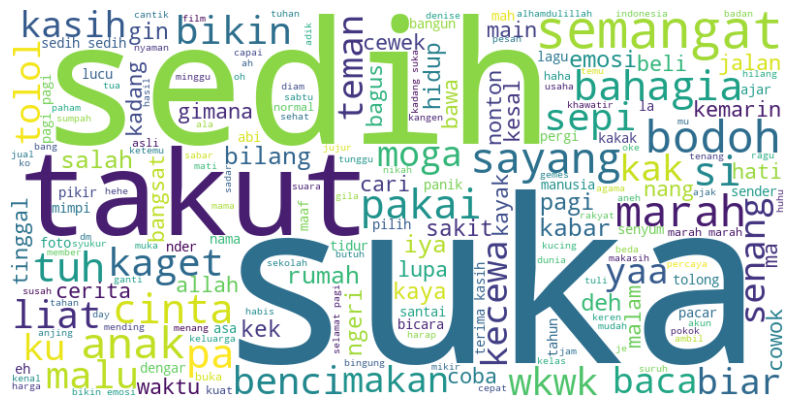

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called train_data with a column "Tweet"
# containing the tweets

# Convert lists of tweets into a single string
all_tweets = ' '.join([tweet for sublist in train_data['Tweet'] for tweet in sublist])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': eda_data['Tweet'],
    'After ': train_data['Tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah di buat emosi :),"[pagi, emosi]"
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh..","[stabilitas, negara, memange, tahun, negara, aman, sby, subur, ormas, radikal, intoleran, teroris, afiliasi, partai, narasi, klhtn, intelektual, bodoh]"
2,dah lah emosi mulu liat emyu,"[emosi, liat]"
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","[aib, bodoh, aib, muncul, tindak, keji, sembunyi, telaah, anak, perempuan, tempeleng, sikap, bungkam, lapor, polisi, adl, lantas, beda]"
4,dih lu yg nyebelin bego,"[sebal, bodoh]"
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","[asli, malu, maluin, indo, tolol, rep, latah, cilukba, pakai, huruf, hijaiyah, ngntd, ganti, huruf, pakai, salib, tiktok, filipin, fyp, repnya, ngtd, dasar, goblogg, trend, tiktok, ter, tolol]"
6,drama abg tolol,"[drama, abg, tolol]"
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,"[emosi, katla, kemarin, terang, gin, hasil, aci, kesal]"
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","[bangsat, tribute, no, bencana, no, ngalahin]"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,"[pergi, teriak, nang, kencang, kencang, lupa, wkwj, tolol, mustahil]"


In [ ]:
train_data.to_csv("Dataset/Training/Clean_train_data2.csv")